# Example - Stack Bands
The next example shows how to stack bands into a multiband raster, rescaling the pixels values and then exporting the raster to a tif file.

In [10]:
from rasterian.tools import get_meta, image_to_file
from rasterian.trasformation.scale_intensity_correction import equalize_adapthist
from rasterian.trasformation.stack import create_stacked_raster
from rasterian.plot_img.plot import plot_color

In [2]:
# change path to your raster bands folder
bands_files_path_dir = "../landsat_8_2022/"

### Stack bands to multiband raster

In [3]:
# stack bands to a multiband raster
stacked_raster, raster_meta = create_stacked_raster(bands_files_path_dir)

['../landsat_8_2022/landsat_8_2022_b1.tif', '../landsat_8_2022/landsat_8_2022_b2.tif', '../landsat_8_2022/landsat_8_2022_b3.tif', '../landsat_8_2022/landsat_8_2022_b4.tif', '../landsat_8_2022/landsat_8_2022_b5.tif', '../landsat_8_2022/landsat_8_2022_b6.tif', '../landsat_8_2022/landsat_8_2022_b7.tif']


In [4]:
# print metadata
print(raster_meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7651, 'height': 7731, 'count': 7, 'crs': CRS.from_epsg(32621), 'transform': Affine(30.0, 0.0, 249285.0,
       0.0, -30.0, -2919285.0)}


In [5]:
# check raster shape
stacked_raster.shape

(7, 7731, 7651)

### Rescale raster pixel values

In [6]:
# print first band (blue) mean values of pixels
stacked_raster[0].mean()

6865.35550445148

In [7]:
# rescale raster
stacked_raster_rescaled = equalize_adapthist(stacked_raster)

In [8]:
# print first band (blue) mean values of pixels rescaled
stacked_raster_rescaled[0].mean()

71.90643481073623

### Plot raster

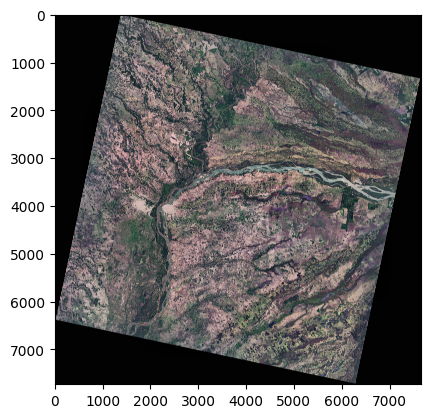

In [11]:
# plot natural color 
plot_color(stacked_raster_rescaled, 3,2,1)

### Save to tif file

In [9]:
# save numpy narray as image file
image_to_file(stacked_raster_rescaled, raster_meta, "output_raster_stacker.tif")